**Evaluate on NSL-KDD Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
train= pd.read_csv('C:\\Users\\moham\\OneDrive\\Desktop\\dataset\\NSL-KDD\\KDDTrain+.txt\\KDDTrain+.txt',header=None)
test= pd.read_csv('C:\\Users\\moham\\OneDrive\\Desktop\\dataset\\NSL-KDD\\KDDTest+.txt\\KDDTest+.txt',header=None)

In [ ]:
train_rows = train.shape[0]

In [ ]:
train_rows

125973

In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
columns = (['duration','protocol_type','service','flag',
'src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
'num_file_creations','num_shells','num_access_files','num_outbound_cmds',
'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate',
'attack','level'])

In [ ]:
train.columns=columns
test.columns=columns

In [ ]:
train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
dataset = pd.concat([train, test], ignore_index=True)

In [ ]:
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
dataset.drop(['duration'], axis=1, inplace=True)

In [ ]:
dataset.head()

,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,tcp,http,SF,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,tcp,http,SF,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                148517 non-null  object 
 1   service                      148517 non-null  object 
 2   flag                         148517 non-null  object 
 3   src_bytes                    148517 non-null  int64  
 4   dst_bytes                    148517 non-null  int64  
 5   land                         148517 non-null  int64  
 6   wrong_fragment               148517 non-null  int64  
 7   urgent                       148517 non-null  int64  
 8   hot                          148517 non-null  int64  
 9   num_failed_logins            148517 non-null  int64  
 10  logged_in                    148517 non-null  int64  
 11  num_compromised              148517 non-null  int64  
 12  root_shell                   148517 non-null  int64  
 13 

array([[<Axes: title={'center': 'src_bytes'}>,
        <Axes: title={'center': 'dst_bytes'}>,
        <Axes: title={'center': 'land'}>,
        <Axes: title={'center': 'wrong_fragment'}>,
        <Axes: title={'center': 'urgent'}>,
        <Axes: title={'center': 'hot'}>],
       [<Axes: title={'center': 'num_failed_logins'}>,
        <Axes: title={'center': 'logged_in'}>,
        <Axes: title={'center': 'num_compromised'}>,
        <Axes: title={'center': 'root_shell'}>,
        <Axes: title={'center': 'su_attempted'}>,
        <Axes: title={'center': 'num_root'}>],
       [<Axes: title={'center': 'num_file_creations'}>,
        <Axes: title={'center': 'num_shells'}>,
        <Axes: title={'center': 'num_access_files'}>,
        <Axes: title={'center': 'num_outbound_cmds'}>,
        <Axes: title={'center': 'is_host_login'}>,
        <Axes: title={'center': 'is_guest_login'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'srv_count'}>,
        <Axes: titl

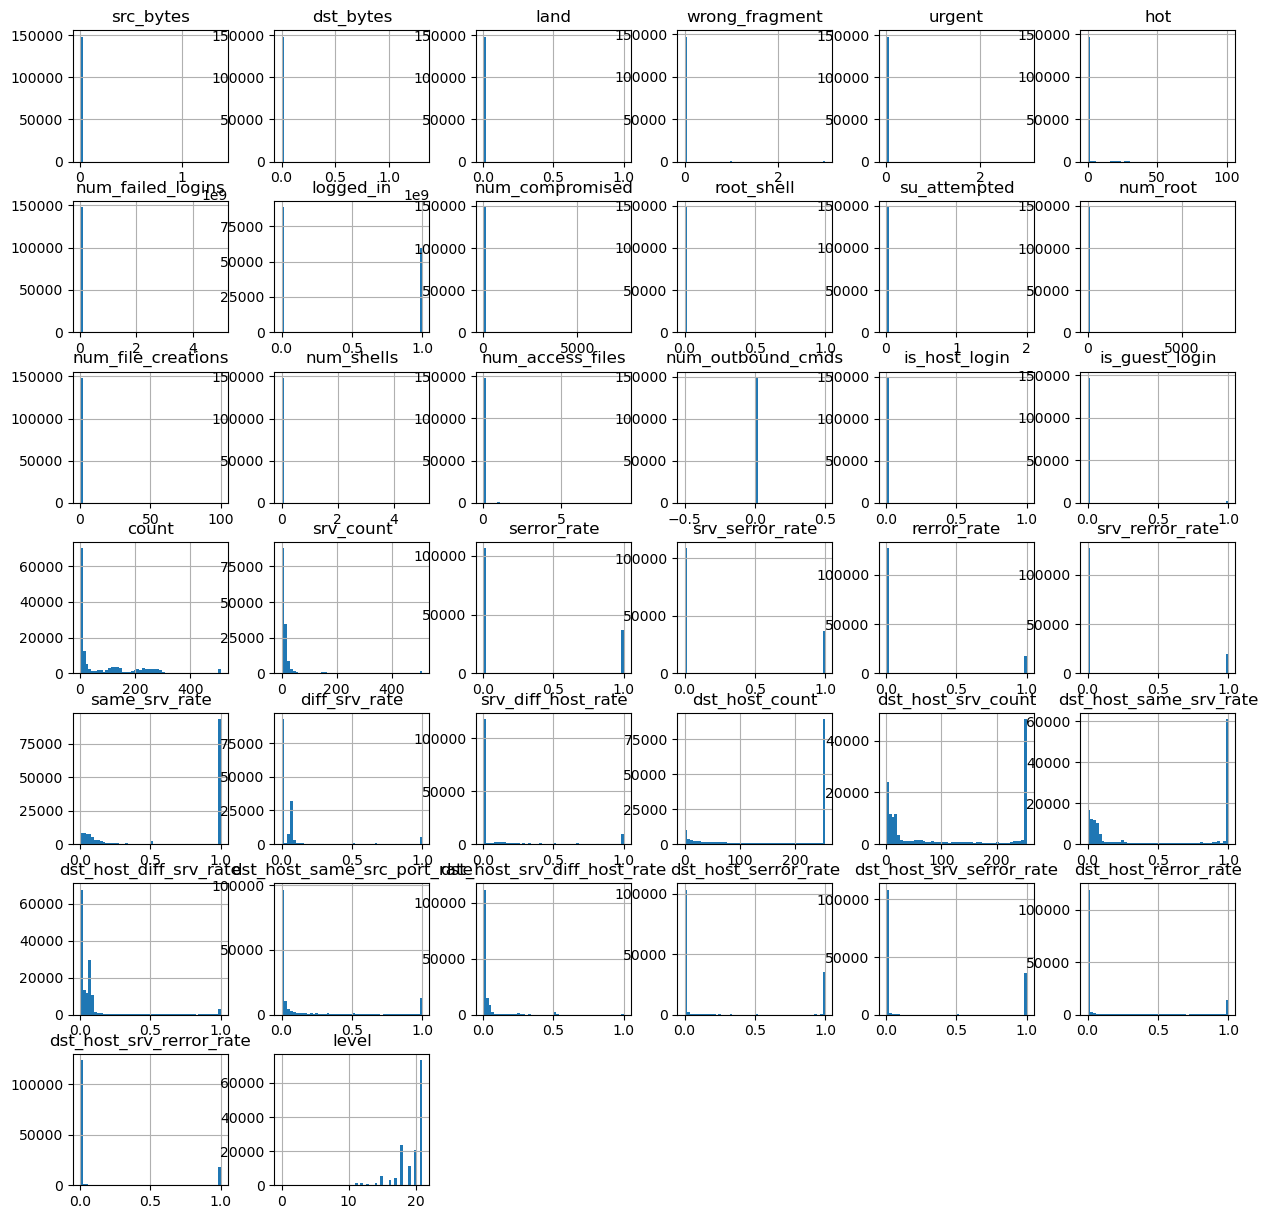

In [ ]:
dataset.hist(bins = 50,figsize = (15,15))

**Handle missing values**

In [ ]:
dataset.isnull().sum()

protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

no missing values

In [ ]:
print(dataset['level'].unique())

[20 15 19 21 18 17 16 12 14 11  2 13 10  9  8  7  3  5  1  6  0  4]


In [ ]:
print(dataset['protocol_type'].unique())

['tcp' 'udp' 'icmp']


In [ ]:
print(dataset['service'].unique())

['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']


In [ ]:
print(dataset['flag'].unique())

['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']


In [ ]:
print(dataset['attack'].unique())

['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl' 'saint' 'mscan' 'apache2' 'snmpgetattack'
 'processtable' 'httptunnel' 'ps' 'snmpguess' 'mailbomb' 'named'
 'sendmail' 'xterm' 'worm' 'xlock' 'xsnoop' 'sqlattack' 'udpstorm']


In [ ]:
def changing_label(dataset):
    if 'attack' in dataset.columns:
        attack_map = {
            'Dos': ['neptune', 'smurf', 'pod', 'back', 'teardrop', 'land', 'apache2',
                    'processtable', 'udpstorm', 'mailbomb', 'worm'],
            'R2L': ['warezclient', 'guess_passwd', 'ftp_write', 'multihop', 'imap', 'warezmaster',
                    'phf', 'spy', 'snmpgetattack', 'snmpguess', 'httptunnel', 'sendmail', 'xlock',
                    'xsnoop', 'named'],
            'Probe': ['ipsweep', 'portsweep', 'nmap', 'satan', 'saint', 'mscan'],
            'U2R': ['rootkit', 'buffer_overflow', 'loadmodule', 'perl', 'ps', 'xterm', 'sqlattack'],
        }


        attackColumn = {attack: category for category, attacks in attack_map.items() for attack in attacks}


        dataset['attack'] = dataset['attack'].map(attackColumn).fillna(dataset['attack'])

    return dataset

In [ ]:
dataset = changing_label(dataset)

In [ ]:
dataset['attack'].unique()

array(['normal', 'Dos', 'R2L', 'Probe', 'U2R'], dtype=object)

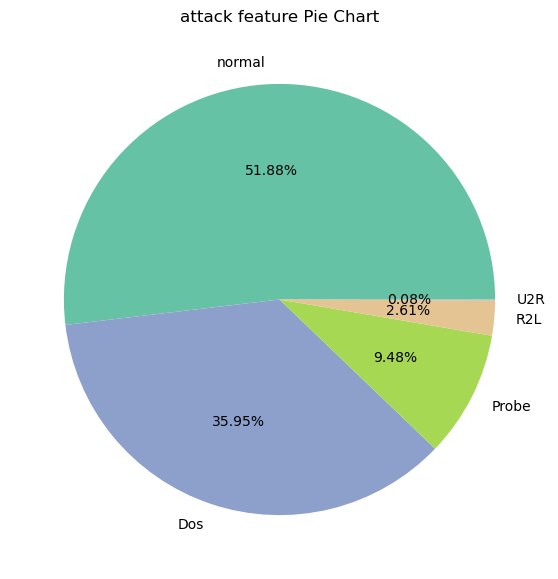

In [ ]:
dataset['attack'].value_counts().plot(kind='pie', autopct='%1.2f%%', figsize=(7, 7), cmap='Set2')

plt.title("attack feature Pie Chart")
plt.ylabel('')
plt.show()

for multiclass

In [ ]:
dataset.head(3)

,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15
2,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,Dos,19


In [ ]:
dataset.head(3)

,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15
2,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,Dos,19


In [ ]:
dataset.head(3)

,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15
2,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,Dos,19


In [ ]:
dataset.head(3)

,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15
2,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,Dos,19


**Identify numerical and categorical features**

In [ ]:
numerical_col_m = dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_col_m = dataset.select_dtypes(include=['object']).columns

**Feature scaling**

In [ ]:
scaler = MinMaxScaler()

**Label Encoding**

In [ ]:
dataset[['protocol_type', 'service', 'flag' ]] = dataset[['protocol_type', 'service', 'flag' ]].apply(LabelEncoder().fit_transform)

In [ ]:
dataset.head(3)

,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,1,20,9,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,2,44,9,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15
2,1,49,5,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,Dos,19


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                148517 non-null  int32  
 1   service                      148517 non-null  int32  
 2   flag                         148517 non-null  int32  
 3   src_bytes                    148517 non-null  int64  
 4   dst_bytes                    148517 non-null  int64  
 5   land                         148517 non-null  int64  
 6   wrong_fragment               148517 non-null  int64  
 7   urgent                       148517 non-null  int64  
 8   hot                          148517 non-null  int64  
 9   num_failed_logins            148517 non-null  int64  
 10  logged_in                    148517 non-null  int64  
 11  num_compromised              148517 non-null  int64  
 12  root_shell                   148517 non-null  int64  
 13 

In [ ]:
for column in ['protocol_type', 'service', 'flag']:
    print(f"Unique values in {column}: {dataset[column].unique()}\n")

Unique values in protocol_type: [1 2 0]

Unique values in service: [20 44 49 24 51 36 38 14 35 60 18 12 58 67  2 54  7 66 37 65  4 11 19  5
 32 15 21 68 59 26 16 69 28 29 13 30 33 57 34 31 55 63 23 17 43 10 42  6
  8 56  9 53 40 47 41  0 46 48 62 45 50 39 52  1 64 27  3 25 61 22]

Unique values in flag: [ 9  5  1  4 10  2  6  3  8  7  0]



In [ ]:
dataset.head()

,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,1,20,9,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,2,44,9,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,1,49,5,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,19
3,1,24,9,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,1,24,9,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


**Handle duplicate values**

In [ ]:
dataset.duplicated().sum()

2015

In [ ]:
dataset.drop_duplicates(subset=None, keep="first", inplace=True)

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146502 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                146502 non-null  int32  
 1   service                      146502 non-null  int32  
 2   flag                         146502 non-null  int32  
 3   src_bytes                    146502 non-null  int64  
 4   dst_bytes                    146502 non-null  int64  
 5   land                         146502 non-null  int64  
 6   wrong_fragment               146502 non-null  int64  
 7   urgent                       146502 non-null  int64  
 8   hot                          146502 non-null  int64  
 9   num_failed_logins            146502 non-null  int64  
 10  logged_in                    146502 non-null  int64  
 11  num_compromised              146502 non-null  int64  
 12  root_shell                   146502 non-null  int64  
 13  su_a

In [ ]:
y=dataset['attack']
x=dataset.drop(columns=['attack'])


In [ ]:
print(x.head())
print(x.info())


   protocol_type  service  flag  src_bytes  dst_bytes  land  wrong_fragment  \
0              1       20     9        491          0     0               0   
1              2       44     9        146          0     0               0   
2              1       49     5          0          0     0               0   
3              1       24     9        232       8153     0               0   
4              1       24     9        199        420     0               0   

   urgent  hot  num_failed_logins  ...  dst_host_srv_count  \
0       0    0                  0  ...                  25   
1       0    0                  0  ...                   1   
2       0    0                  0  ...                  26   
3       0    0                  0  ...                 255   
4       0    0                  0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


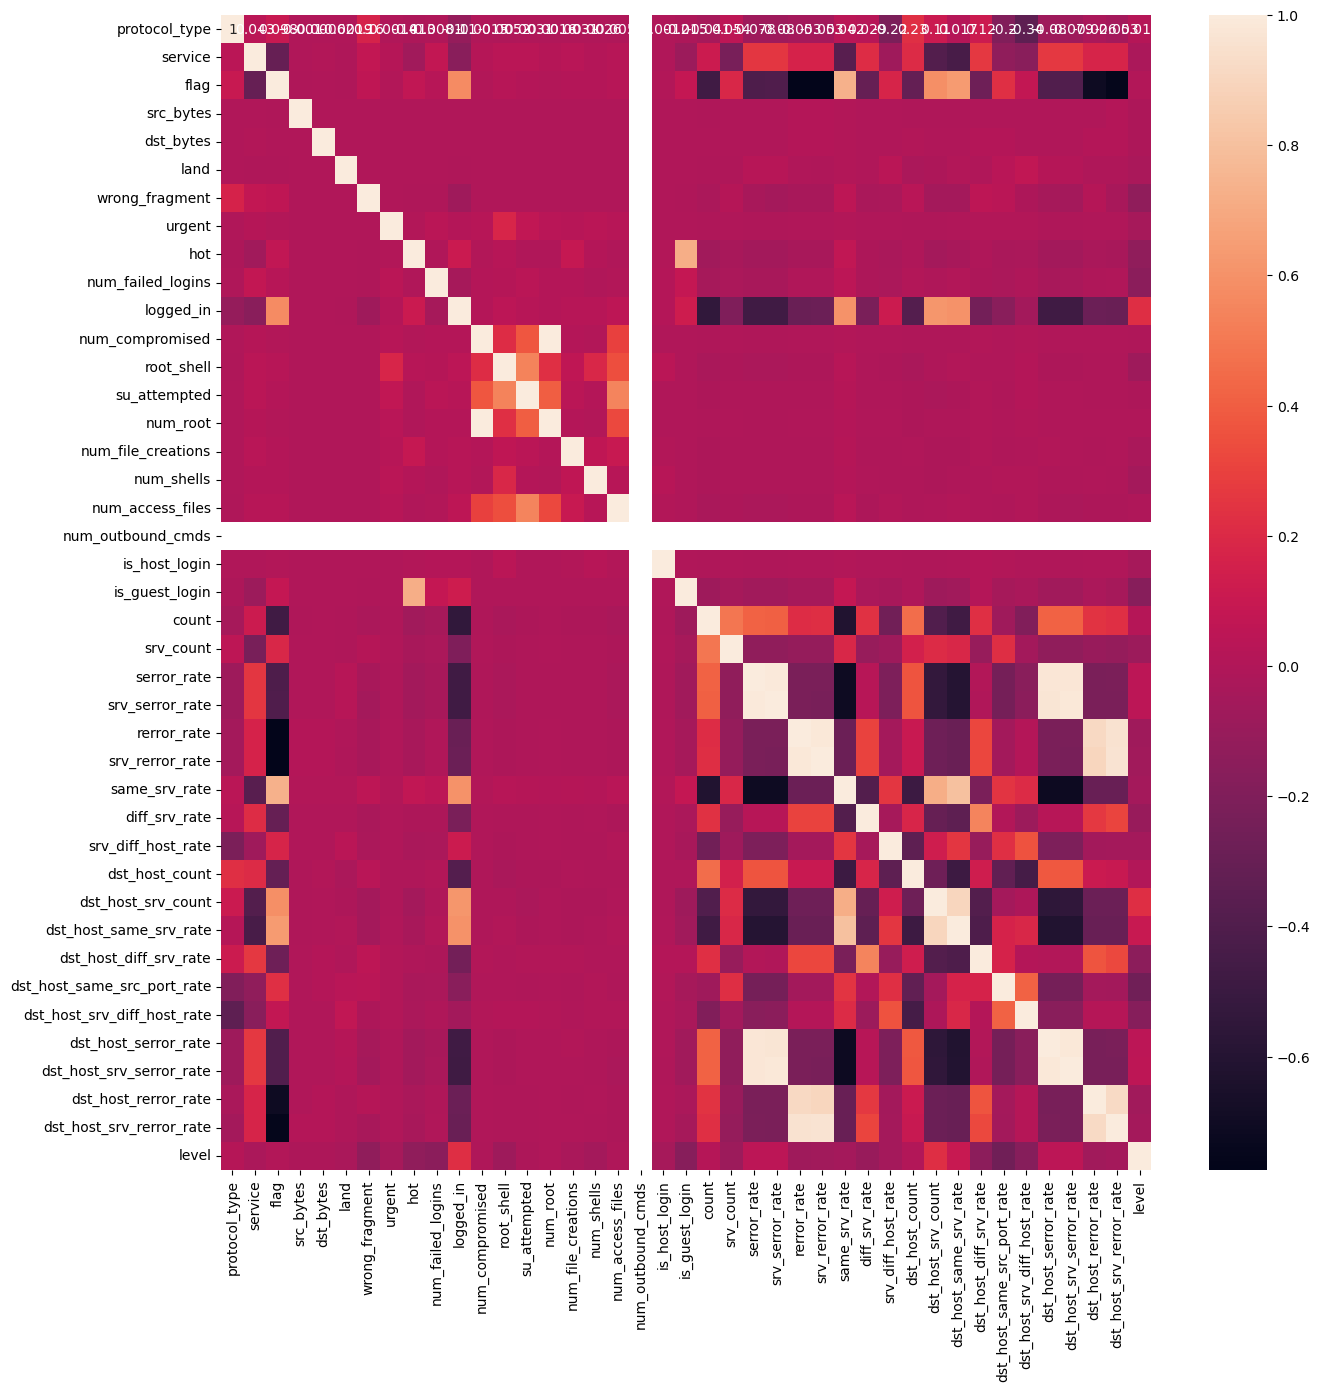

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(x.corr(), annot=True)
plt.show()

**Feature selection**

*1. ANOVA*

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
f_values, p_values = f_classif(x, y)

In [ ]:
print("X_m shape:", x.shape)
print("f_values shape:", len(f_values))
print("p_values shape:", len(p_values))


X_m shape: (146502, 41)
f_values shape: 41
p_values shape: 41


In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)




In [ ]:
feature_scores = pd.DataFrame({'Feature': x.columns, 'F-value': f_values, 'p-value': p_values})

In [ ]:
feature_scores

,Feature,F-value,p-value
0,protocol_type,3307.225700,0.000000e+00
1,service,3690.149945,0.000000e+00
2,flag,30040.693867,0.000000e+00
3,src_bytes,11.597764,2.048842e-09
4,dst_bytes,5.417866,2.331235e-04
5,land,5.105628,4.123025e-04
6,wrong_fragment,418.569257,0.000000e+00
7,urgent,1462.867980,0.000000e+00
8,hot,1359.752935,0.000000e+00
9,num_failed_logins,3720.270365,0.000000e+00


In [ ]:
selected_anova_multi = feature_scores[feature_scores['p-value'] < 0.05]['Feature'] # for multiclass

In [ ]:
selected_anova_multi

0                   protocol_type
1                         service
2                            flag
3                       src_bytes
4                       dst_bytes
5                            land
6                  wrong_fragment
7                          urgent
8                             hot
9               num_failed_logins
10                      logged_in
11                num_compromised
12                     root_shell
13                   su_attempted
14                       num_root
15             num_file_creations
16                     num_shells
17               num_access_files
19                  is_host_login
20                 is_guest_login
21                          count
22                      srv_count
23                    serror_rate
24                srv_serror_rate
25                    rerror_rate
26                srv_rerror_rate
27                  same_srv_rate
28                  diff_srv_rate
29             srv_diff_host_rate
30            

**2. PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=0.95)

In [ ]:
X_pca_mul = pca.fit_transform(x)

**3. Mutual Information**

In [ ]:
from sklearn.feature_selection import mutual_info_classif


# for multi class

mi = mutual_info_classif(x, y)


feature_scores_mi = pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
print(feature_scores_mi)




top_features_mi = feature_scores_mi[feature_scores_mi['Mutual Information'] > 0.1]['Feature']
print("Top features selected by Mutual Information:", top_features_mi)


                        Feature  Mutual Information
0                 protocol_type            0.089104
1                       service            0.581884
2                          flag            0.458447
3                     src_bytes            0.724262
4                     dst_bytes            0.500845
5                          land            0.001313
6                wrong_fragment            0.005534
7                        urgent            0.000455
8                           hot            0.026307
9             num_failed_logins            0.012802
10                    logged_in            0.295085
11              num_compromised            0.008366
12                   root_shell            0.002719
13                 su_attempted            0.000000
14                     num_root            0.003106
15           num_file_creations            0.002081
16                   num_shells            0.000366
17             num_access_files            0.002034
18          

**4. RFE**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=1000)

**splitting the dataset into training and testing datas**

*for multiclass split*

In [ ]:
X_anova = x[selected_anova_multi]

In [ ]:
X_anova

,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,1,20,9,491,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,2,44,9,146,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,1,49,5,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,1,24,9,232,8153,0,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,1,24,9,199,420,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,1,54,9,2599,293,0,0,0,0,0,...,186,0.73,0.13,0.00,0.00,0.00,0.00,0.26,0.00,11
148512,1,54,9,794,333,0,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,21
148513,1,24,9,317,938,0,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,21
148514,1,24,9,54540,8314,0,0,0,2,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,15


In [ ]:
X_train_m, X_test_m = X_anova.iloc[:train_rows], X_anova.iloc[train_rows:]
y = pd.Series(y)
y_train, y_test = y.iloc[:train_rows], y.iloc[train_rows:]

In [ ]:
X_train=scaler.fit_transform(X_train_m)
X_test=scaler.fit_transform(X_test_m)

In [ ]:
y_train.value_counts()


4    67571
0    46351
1    10863
2     1132
3       56
Name: count, dtype: int64

In [ ]:
# !pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn

^C


In [ ]:
!pip install --upgrade scikit-learn imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
# !pip uninstall scikit-learn imbalanced-learn
# #

In [ ]:
# !pip cache purge

In [ ]:
# !pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1

In [ ]:
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
    --------------------------------------- 0.1/8.3 MB 3.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.3 MB 6.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/8.3 MB 7.8 MB/s eta 0:00:01
   ------- -------------------------------- 1.6/8.3 MB 9.0 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/8.3 MB 11.6 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.3 MB 14.0 MB/s eta 0:00:01
   -------------------------- ------------- 5.4/8.3 MB 17.4 MB/s eta 0:00:01
   ------------------------------------ --- 7.5/8.3 MB 20.9 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 21.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/226.0 kB ? eta -:--:--
   --------------------------------------- 226.0/226.0 kB 14.4 MB/s eta 0:00:00
  Attempting 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-tabular 1.1.1 requires scikit-learn>=1.3.0, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
# import sklearn
# import imblearn
# from imblearn.over_sampling import SMOTE, ADASYN
# from collections import Counter
# smote = ADASYN(sampling_strategy='minority', random_state=42)
# # X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# Import required libraries
import sklearn
import imblearn
import imblearn.combine
from imblearn.combine import SMOTETomek
from collections import Counter

# Initialize SMOTE Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()


2    67571
3    67571
1    67570
0    67568
4    67567
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import  classification_report

**Building models**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#LogisticRegression for multi class
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(max_iter=1500, random_state=42,multi_class='multinomial',solver='lbfgs')
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      6589
           1       0.73      0.92      0.82      2164
           2       0.79      0.73      0.76      2663
           3       0.16      0.52      0.24        63
           4       0.93      0.95      0.94      9050

    accuracy                           0.89     20529
   macro avg       0.72      0.80      0.73     20529
weighted avg       0.90      0.89      0.89     20529



In [ ]:
# 2. Support Vector Machine (SVM) for multi class
from sklearn.svm import SVC
svm_model = SVC(kernel='poly', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      6589
           1       0.86      0.95      0.90      2164
           2       0.88      0.94      0.91      2663
           3       0.44      0.49      0.47        63
           4       0.98      0.96      0.97      9050

    accuracy                           0.95     20529
   macro avg       0.83      0.86      0.84     20529
weighted avg       0.95      0.95      0.95     20529



In [ ]:
# 3. KNN  for multiclass
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

print("KNN Classification Report for multiclass:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report for multiclass:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6589
           1       0.88      0.96      0.92      2164
           2       0.93      0.93      0.93      2663
           3       0.47      0.54      0.50        63
           4       0.98      0.97      0.97      9050

    accuracy                           0.96     20529
   macro avg       0.85      0.87      0.86     20529
weighted avg       0.96      0.96      0.96     20529



In [ ]:
#4.  Decision Tree for multiclass
from sklearn.tree import DecisionTreeClassifier
model_tree_multi = DecisionTreeClassifier(random_state=42,max_depth=15,min_samples_split=5,criterion='entropy')
model_tree_multi.fit(X_train, y_train)
y_pred_tree_multi = model_tree_multi.predict(X_test)

print("Classification Report for decision tree multiclass:")
print(classification_report(y_test, y_pred_tree_multi))


Classification Report for decision tree multiclass:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      6589
           1       0.89      0.78      0.83      2164
           2       0.90      0.68      0.78      2663
           3       0.35      0.13      0.19        63
           4       0.86      0.98      0.91      9050

    accuracy                           0.90     20529
   macro avg       0.80      0.70      0.74     20529
weighted avg       0.91      0.90      0.90     20529



In [ ]:
# 5.Random Forest for multiclass
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42,n_estimators=200,max_depth=20,min_samples_leaf=2,max_features='sqrt')
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Random Forest Classification Report for multiclass:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report for multiclass:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6589
           1       0.90      0.98      0.94      2164
           2       0.97      0.91      0.94      2663
           3       0.47      0.14      0.22        63
           4       0.97      0.97      0.97      9050

    accuracy                           0.97     20529
   macro avg       0.86      0.80      0.81     20529
weighted avg       0.97      0.97      0.97     20529



**Ensemble Learning**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor

**1. By Voting  ensemble learning**

for multi class

In [ ]:
li_multi = [
    ("dt1", DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)),
    ("sv1", SVC(probability=True , C=0.1, gamma='auto')),
    ("rf1", RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=5)),
    ("knn1", KNeighborsClassifier(n_neighbors=15)),
    ("lg1", LogisticRegression(C=1.0))
]

In [ ]:
vc_multi=VotingClassifier(estimators=li_multi,voting="soft",  weights=[1,1,1,1,1] )

In [ ]:
vc_multi.fit(X_train,y_train)

VotingClassifier(estimators=[('dt1',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=5,
                                                     min_samples_split=10)),
                             ('sv1',
                              SVC(C=0.1, gamma='auto', probability=True)),
                             ('rf1',
                              RandomForestClassifier(max_depth=7,
                                                     min_samples_leaf=5)),
                             ('knn1', KNeighborsClassifier(n_neighbors=15)),
                             ('lg1', LogisticRegression())],
                 voting='soft', weights=[1, 1, 1, 1, 1])

In [ ]:
vc_multi.score(X_train,y_train)*100  ,    vc_multi.score(X_test,y_test)*100

(99.26860383546399, 92.76145939889912)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


In [ ]:
cv_scores = cross_val_score(vc_multi, X_train, y_train, cv=5, scoring='accuracy')

In [ ]:
vc_multi.fit(X_train, y_train)
test_score = vc_multi.score(X_test, y_test)

print("Test Accuracy is :", test_score)

Test Accuracy is : 0.9277120171464757


In [ ]:
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation Accuracy Scores: [0.99143111 0.99214148 0.99194897 0.99109059 0.99209697]
Mean CV Accuracy: 0.9917418236984672
